Accuracy: 91.11%
            Actual        Predicted
0  Iris-versicolor  Iris-versicolor
1      Iris-setosa      Iris-setosa
2   Iris-virginica   Iris-virginica
3  Iris-versicolor  Iris-versicolor
4  Iris-versicolor   Iris-virginica
5      Iris-setosa      Iris-setosa
6  Iris-versicolor  Iris-versicolor
7   Iris-virginica   Iris-virginica
8  Iris-versicolor  Iris-versicolor
9  Iris-versicolor   Iris-virginica


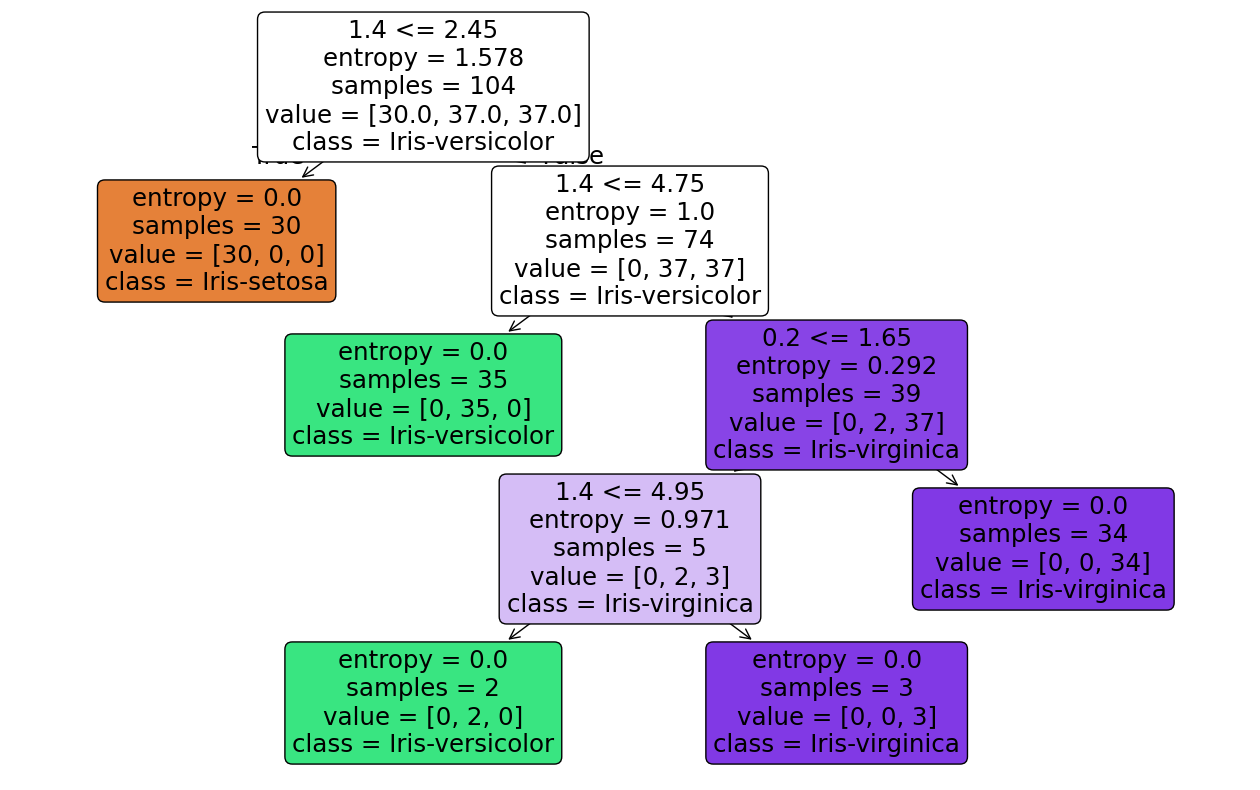

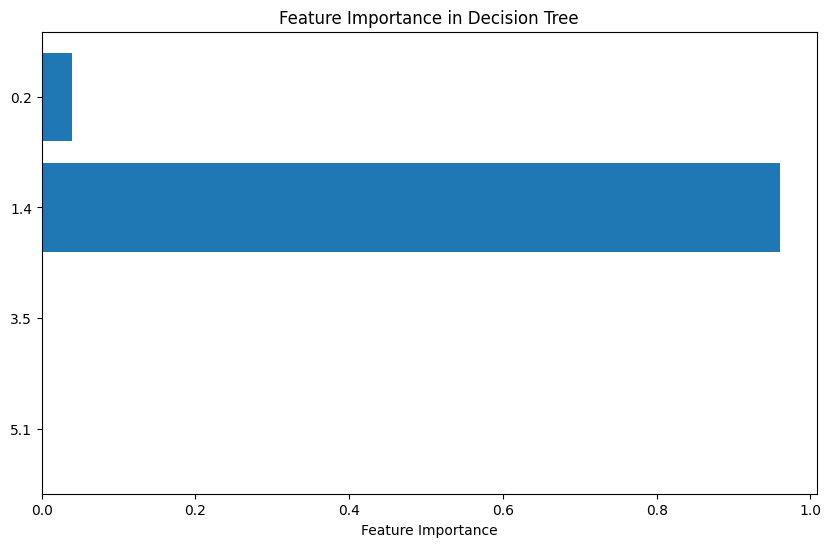

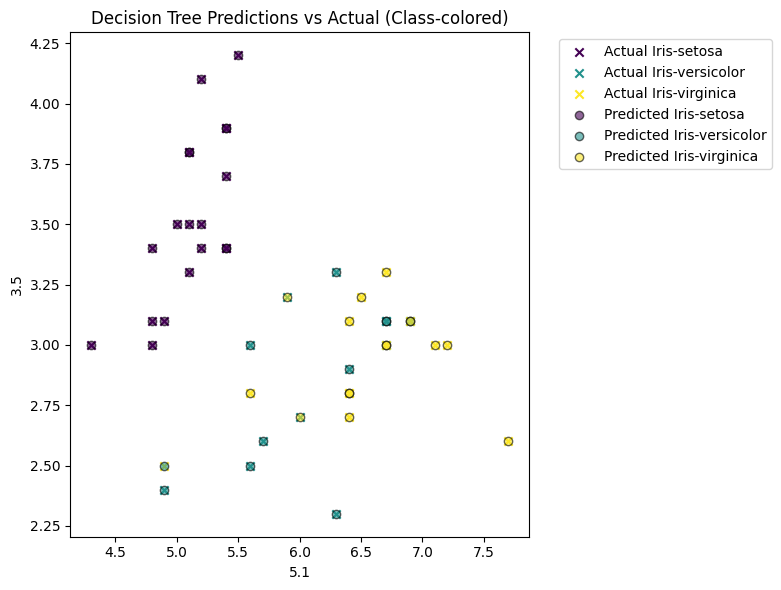

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/iris.csv')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

accuracy = dt_model.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

y_pred = dt_model.predict(X_test)

comparison = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred)
})
print(comparison.head(10))

plt.figure(figsize=(16,10))
plot_tree(dt_model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()

importances = dt_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()

if X.shape[1] >= 2:
    plt.figure(figsize=(8,6))

    colors = plt.cm.viridis(np.linspace(0, 1, len(le.classes_)))

    for i, class_name in enumerate(le.classes_):
        plt.scatter(
            X_test.iloc[y_test == i, 0],
            X_test.iloc[y_test == i, 1],
            color=colors[i],
            marker='x',
            label=f'Actual {class_name}'
        )

    for i, class_name in enumerate(le.classes_):
        plt.scatter(
            X_test.iloc[y_pred == i, 0],
            X_test.iloc[y_pred == i, 1],
            color=colors[i],
            marker='o',
            edgecolor='black',
            alpha=0.6,
            label=f'Predicted {class_name}'
        )

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Tree Predictions vs Actual (Class-colored)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
